# Deep & Convolutional Neural Networks

In [0]:
# =========================================================================================================================================== #
# ======= STOP! IF ON COLAB, MAKE SURE YOU ENABLE GPU SUPPORT BY GOING TO RUNTIME > CHANGE RUNTIME TYPE > HARDWARE ACCELERATOR > GPU ======== #
# ========^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^======== #
!pip install keras==2.3.1
!pip install --upgrade tensorflow
# version prerequisite before we start

In [0]:
import numpy as np
import pandas as pd
# These python libraries are standard for use with deep learning. Think of bringing a toolbox with a
# bunch of useful functions when you call 'import'. We rename each into `np` and `pd` to save time

### Now, we'll download a dataset of images that we can use for training. They are a compilation of handwritten digits, called MNIST.

In [0]:
from keras.datasets import mnist 
# importing the dataset library

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
# downloading the dataset. We also split the data into `train` and `test`, remember this for later...

### We use the `x_train` and `y_train` to make the model learn/'train' (obviously) on handwritten digits. 
### Then, we test how good the model is using `x_test` and `y_test`, which are handwritten image data that it had _never_ seen before.

In [0]:
import matplotlib.pyplot as plt 
# This library can be used to visualize the kind of data we just downloaded

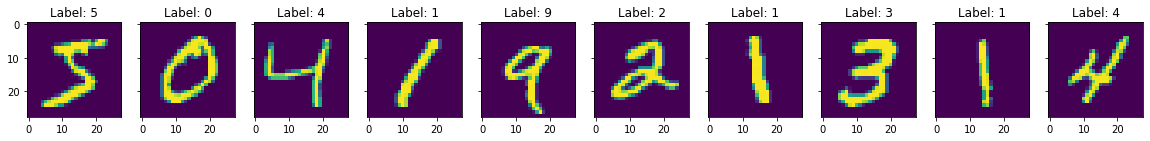

In [38]:
fig, axs = plt.subplots(1,10,figsize=(20,20))
for i,ax in enumerate(axs):
    ax.label_outer()
    ax.imshow(x_train[i])
    ax.set_title(f'Label: {y_train[i]}')

### ^^ These are 10 pics of different numbers, with (hopefully) correct labels corresponding it


In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# we need to reformat some of the labels into a more usable form for later. This is called one-hot encoding (google it if you like).

---

# Keras

### Hold up, whats Deep Learning again?
![DNN illustration](https://ml4a.github.io/images/figures/mnist_1layer.png)
### Deep Learning gets computers to do certain things that humans could do really well (e.g. identifing digits) by modeling a simple brain with mathematical neurons/nodes, represented as lines and circles as seen above.
### Using this, we can train a model that can very accurately determine digits on an image.

### Keras is a toolbox of functions just like `numpy` and `pandas`, which is instead specialized for dealing with Artificial Intelligence and Deep Learning...

In [0]:
import keras
# we will be importting certain functions individually later, but its safe to have the whole library than to be sorry

### Keras is based off of the TensorFlow deep learning library, which is developed by Google. Keras is one of the _easiest_ libraries to use.

In [41]:
print(keras.backend.image_data_format()) 
# this is a sanity check, please run and make sure it outputs 'channels_last'. Let us know if it doesn't (low chances of it happening anyways).

channels_last


---

## Making a model with Keras

In [0]:
from keras.models import Sequential 
# allows us to 'build' our deep learning models for prediction
from keras.layers import Dense, Activation, Flatten 
# Some building blocks for our models

In [0]:
model = Sequential() 
# initializing a new model to be made with keras

In [0]:
model.add(Flatten()) # Turn image into a list of numbers to crunch up 
model.add(Dense(16, activation='relu', input_shape=(28*28,))) # input_shape = the dimensions of our image, which is 28 x 28
model.add(Dense(32, activation='relu')) 
model.add(Dense(10, activation='softmax'))

# activation functions => Imagine this kinda like thresholds and action potentials of brain neurons.

# 'relu' is an extremely popular and efficient choice for layers before your last
# 'sigmoid' is chosen if your last layer only has one output node, 'softmax' if multiple nodes

# More info: https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# loss: tells us how far the model is from the 'correct' answer (label). Is basically the model's 'report card' of how well it's doing
# 'categorical_crossentropy' is a robust choice for a loss function when classifiying multiple classes (digits from 0 to 9)

# optimizer: necessary for the model to learn from loss and improve over time as it trains.
# 'adam' is a very efficient optimizer, now used on some of the best deep learning models

### Below, we are 'training' the model by giving it lots of data from `x_train` and `y_train`
### You'll start to see progress bars as the model crunches millions of numbers and learn how to tell apart different numbers.

In [46]:
history = model.fit(x_train,
                    y_train,
                    batch_size=128, 
                    epochs=10) 

# batch size: how many images do you want the model to 'look' at before tweaking itself?
# epochs: how many times do you want the model to work through all the images you gave?

Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 3.0560 - accuracy: 0.2355
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 1.5068 - accuracy: 0.4029
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 1.2297 - accuracy: 0.5241
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.8333 - accuracy: 0.7324
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.6013 - accuracy: 0.8326
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.5192 - accuracy: 0.8589
Epoch 7/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.4798 - accuracy: 0.8698
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.4502 - accuracy: 0.8789
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.4203 - accuracy: 0.8848
Epoch 10/10
60000/60000 [==============================

---

### We can also see how loss and accuracy changes over time (for the better in this case)
### We get and plot the information from `history`, which is defined when we were training the model right before

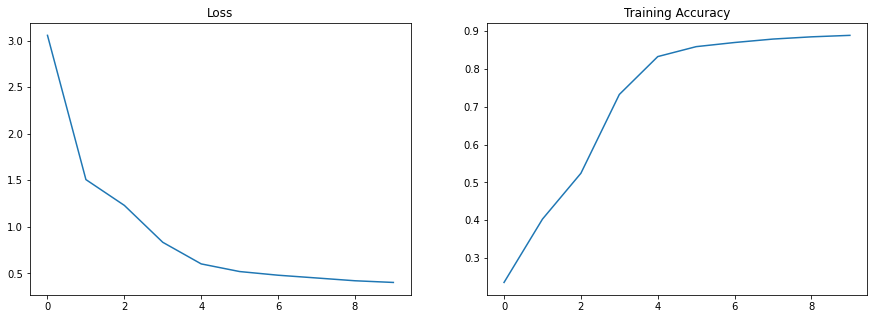

In [47]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(history.history['loss'])
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Training Accuracy')
fig.show()

## Time for the great reveal: __testing our model__

In [48]:
score = model.evaluate(x_test, y_test) 
# we use x_test and y_test to see if our model lives up to its purpose

10000/10000 [==============================] - 1s 61us/step


In [49]:
print(f'Testing Accuracy: {round(score[1]*100,4)}%')
print(f'Testing Loss: {round(score[0],4)}')
# print our test scores (Accuracy and Loss)

Testing Accuracy: 88.8%
Testing Loss: 0.4157


### Usually, it is normal if testing metrics are overall worse than training; after all, the model never saw any of the test data. However, we can still improve this...

---

# Convolutional Neural Networks (CNNs): specialized for image data, like the MNIST handwritten digit dataset.

![CNN animation](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif)

### The bottom (blue) is the original image, and the top (cyan) represents the output of the convolution layer. All of this operates on a _kernel_ , which you see is the 3 x 3 pixel shadow on the bottom transformed into one pixel at the top.

### Convolution layers can have many kernels in a CNN. Kernels look for specific patterns they're assigned with and trace all over the input. They output a very high value if they come across patterns on the input that matches theirs well ... and vice versa.

### All of this helps to extract only the most important features on the input (image) that determines it's classification (in our case, its the core features that classify which number it is)

### Look below for a visualization of CNN's up close (or [here](https://youtu.be/f0t-OCG79-U))

In [50]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/f0t-OCG79-U" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

---
## Making a CNN

In [0]:
from keras.layers import Conv2D, MaxPooling2D 
# we import certain keras-specific functions that let us build CNNs

In [0]:
img_rows = 28
img_cols = 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# We are preprocessing input data... 
# Convolution layers (Conv2D) expect a 3rd layer of RGB color, but MNIST is only single-color channeled (black-white)

In [0]:
model_cnn = Sequential()
# start another model instance

In [0]:
model_cnn.add(Conv2D(16, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model_cnn.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
model_cnn.add(MaxPooling2D()) 
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# kernel_size: pretty self-explanatory (how big your kernel is, in terms of pixels)
# MaxPooling2D is similar to convolution layers, but instead they filter only the highest-valued pixel out of a small region. 
# This helps to decrease computational load, while making it easier to generalize on slightly different data (in this case, different handwriting)

In [0]:
model_cnn.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [56]:
history_cnn = model_cnn.fit(x_train,
                            y_train,
                            batch_size=128,
                            epochs=5) 
# using less epochs since CNN's are more computation-heavy and take more time for each epoch

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.5499 - accuracy: 0.9386
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0473 - accuracy: 0.9851
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0276 - accuracy: 0.9911
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0208 - accuracy: 0.9932
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0169 - accuracy: 0.9942


### You can see how each epoch takes longer to complete. A CNN requires much more computing power and will need to train for a long time, unless you have a GPU.

In [57]:
score = model_cnn.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 64us/step


In [58]:
print(f'Testing Accuracy: {round(score[1]*100,4)}%')
print(f'Testing Loss: {round(score[0],4)}')

Testing Accuracy: 98.06%
Testing Loss: 0.0772


### If done correctly, our score with the CNN should be higher than our previous model. Rerun cells from `model_cnn = Sequential()` if you get an oddly low score.

---

# __*CHALLENGE*__

In [59]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Loading Fashion-MNIST dataset for challenge

4423680/4422102 [==============================] - 2s 1us/step


### You are given a dataset called Fashion_MNIST, a collection of images of different types of clothing (pants, shirts, shoes, etc.) 
### __Make a CNN that can tell apart between these different images, just like the previous examples__
### You have reference to all resources in this notebook, as well as the [keras documentation](https://keras.io/). <sub><sup>(hint: some code that makes the CNN for this dataset is avaliable there!)</sup></sub>

In [63]:
print(x_train.shape)
print(y_train.shape)
#examining the data I'm working with

(60000, 28, 28, 1)
(60000, 10)


In [0]:
fashion_cnn = Sequential()

In [0]:
from keras.layers import Dropout
# if you're fancy, you can use dropout, which sort of handicaps your model during training so it performs better during testing.
# Think of it as tying weights to your legs while runnng to build strength for the real race/marathon/whatever...

In [0]:
fashion_cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) 
fashion_cnn.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
fashion_cnn.add(MaxPooling2D())
fashion_cnn.add(Dropout(0.25))
fashion_cnn.add(Flatten())
fashion_cnn.add(Dense(128, activation='relu'))
fashion_cnn.add(Dropout(0.3))
fashion_cnn.add(Dense(10, activation='softmax'))

In [0]:
fashion_cnn.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [67]:
fashion_cnn.fit(x_train,
                y_train,
                batch_size=128,
                epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.9799 - accuracy: 0.8128
Epoch 2/15
60000/60000 [==============================] - 4s 73us/step - loss: 0.3620 - accuracy: 0.8683
Epoch 3/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.3116 - accuracy: 0.8851
Epoch 4/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.2788 - accuracy: 0.8957
Epoch 5/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.2524 - accuracy: 0.9054
Epoch 6/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.2347 - accuracy: 0.9116
Epoch 7/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.2206 - accuracy: 0.9167
Epoch 8/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.2043 - accuracy: 0.9212
Epoch 9/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.1929 - accuracy: 0.9260
Epoch 10/15
60000/60000 [==============================

In [68]:
score = fashion_cnn.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 91us/step


In [69]:
print(f'Testing Accuracy: {round(score[1]*100,4)}%')
print(f'Testing Loss: {round(score[0],4)}')

Testing Accuracy: 91.35%
Testing Loss: 0.2941


### ***Can your model score higher? ^^***